# Predictions

#### In this notebook I am building the forecasting models. First I have already created an excel file with the full dataset (in the previous notebooks) which I export it as a DataFrame. I will not use all the features (independent variables) from the dataset but I select a subset of them considering criteria like correlations and the Recursive feature elimination with cross-validation algorithm from scikit learn. The time horizon of the forecasts is defined as 12 months, so I make the appropriate shifting of the sales data. I will use several forecasting methods like (Exponential Smoothing, Arima, Linear Regression, AutoRegression, Decision Tree Regression, Random Forest Regression ans Support Vector  Regression). I split the dataset to a train and a test set and I use three kind of metrics (Root Mean Square Error, Mean Absolute Error Mean Absolute Percentage Error) to measure the accuracy between the predicited values and the real ones. In the notebook I first perform the forecasts for the Toyota brand in more detail and then I do the same for the rest of the brands through a loop. It wasn't sought hyperparameter tuning (Grid Search etc)

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import pmdarima as pm



from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler





from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [56]:
dataset=pd.read_excel('/Users/loukas/Desktop/dataset.xlsx',sheet_name=0,index_col='date')

In [57]:
toyota=dataset['TOYOTA']
toyota.index=pd.to_datetime(toyota.index)
toyota.index = pd.DatetimeIndex(toyota.index.values,freq=toyota.index.inferred_freq)
toyota=pd.DataFrame(toyota)
toyota["#"]=list(range(len(toyota)))
toyota_test=(toyota.iloc[176:211]) 

In [58]:
scores={}

# Baseline models (benchmarks)

First I perfomed some forecasts using "traditional" forecasting methods such as Exponential Smoothin, Arima, AR-model in order to have benchmark which is not affected by the use of the Google Trends Data

## model_1 TOYOTA Exponential smoothing

Using statsmodels package. The forecasts were done perfoming expanding time window technique.

/Users/loukas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


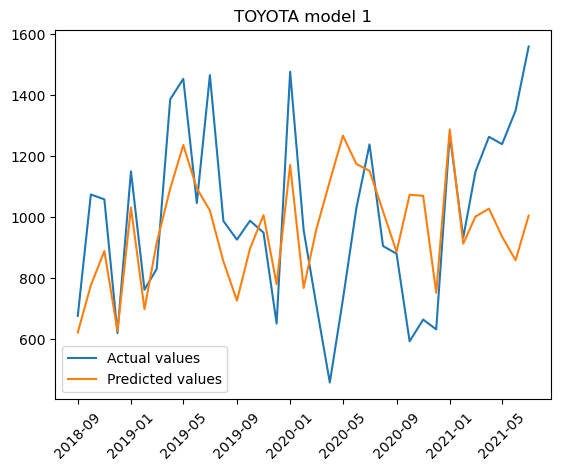

RMSE =  274.9083460067447
MAPE =  0.24099901949523164
MAE =  213.43785036641336


In [59]:
toyota=dataset['TOYOTA']
toyota.index=pd.to_datetime(toyota.index)
toyota.index = pd.DatetimeIndex(toyota.index.values,freq=toyota.index.inferred_freq)
toyota=pd.DataFrame(toyota)
toyota["#"]=list(range(len(toyota)))
test=(toyota.iloc[176:211]) 

f1=[]
for i in range(35):
    train=toyota.iloc[:165+i,0]
    fit1 = sm.tsa.ExponentialSmoothing(train,seasonal_periods=12,seasonal="add",use_boxcox=False, initialization_method="estimated").fit()
    fcast1 = fit1.forecast(12)
    f1.append(fcast1[11])

    


f=pd.DataFrame(f1,index=toyota_test.index,columns=["forecast"])
if np.inf in list(f["forecast"]):
    f.replace([np.inf, -np.inf], train.mean(), inplace=True)
f.fillna(train.mean(),inplace=True)



plt.plot(toyota_test['TOYOTA'])
plt.plot(f)
plt.tick_params(axis='x', which='major',labelsize=10,labelrotation=45)
plt.title("TOYOTA model 1")
plt.legend(["Actual values","Predicted values"])
plt.savefig("/Users/loukas/Desktop/par/TOYOTA_model01.png",bbox_inches='tight')
plt.show()

print("RMSE = ",np.sqrt(mean_squared_error(toyota_test['TOYOTA'],f)))
print("MAPE = ",mean_absolute_percentage_error(toyota_test['TOYOTA'],f))
print('MAE = ',mean_absolute_error(toyota_test['TOYOTA'],f))

scores['model_1']=[np.sqrt(mean_squared_error(toyota_test['TOYOTA'],f)),mean_absolute_percentage_error(toyota_test['TOYOTA'],f),mean_absolute_error(toyota_test['TOYOTA'],f)]    

## model_2 TOYOTA Auto Exponential Smoothing

Using sktime library in order that I didn't perform the above Exponential Smoothing wrong. The forecasts were done perfoming expanding time window technique.

{'additive_only': False, 'allow_multiplicative_trend': False, 'auto': True, 'bounds': None, 'callback': None, 'damped_trend': False, 'dates': None, 'disp': False, 'error': 'add', 'freq': None, 'full_output': True, 'ignore_inf_ic': True, 'information_criterion': 'aic', 'initial_level': None, 'initial_seasonal': None, 'initial_trend': None, 'initialization_method': 'estimated', 'maxiter': 1000, 'missing': 'none', 'n_jobs': -1, 'restrict': True, 'return_params': False, 'seasonal': None, 'sp': 12, 'start_params': None, 'trend': None}
{'additive_only': False, 'allow_multiplicative_trend': False, 'auto': True, 'bounds': None, 'callback': None, 'damped_trend': False, 'dates': None, 'disp': False, 'error': 'add', 'freq': None, 'full_output': True, 'ignore_inf_ic': True, 'information_criterion': 'aic', 'initial_level': None, 'initial_seasonal': None, 'initial_trend': None, 'initialization_method': 'estimated', 'maxiter': 1000, 'missing': 'none', 'n_jobs': -1, 'restrict': True, 'return_params': 

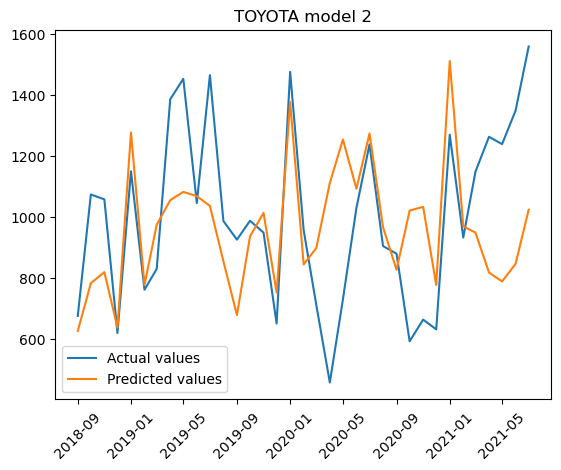

RMSE =  285.7966017954473
MAPE =  0.24434598384563314
MAE =  222.13945218675772


In [60]:
from sktime.forecasting.ets import AutoETS

toyota=pd.DataFrame(dataset['TOYOTA'])
toyota.index=idx =pd.period_range(start='2004-01', end='2021-07', freq='M')
toyota=pd.DataFrame(toyota,columns=["TOYOTA"])
toyota["TOYOTA"]=toyota["TOYOTA"].astype("float64")
test=toyota.iloc[-35:,0]
f1=[]
for i in range(35):
    train=toyota.iloc[:165+i,0]
    fit1 = AutoETS(auto=True, n_jobs=-1, sp=12).fit(train)
    fcast1 = fit1.predict(12)
    f1.append(fcast1[-1])
    print(fit1.get_params())



    


f=pd.DataFrame(f1,index=test.index,columns=["forecast"])
if np.inf in list(f["forecast"]):
    f.replace([np.inf, -np.inf], train.mean(), inplace=True)
f.fillna(train.mean(),inplace=True)




f.index=f.index.astype("string")
test=pd.DataFrame(test)
test.index=test.index.astype('string')

tir=pd.DatetimeIndex(test.index)
plt.plot(pd.DataFrame(list(test["TOYOTA"]),index=tir))
plt.plot(pd.DataFrame(list(f["forecast"]),index=tir))
plt.tick_params(axis='x', which='major',labelsize=10,labelrotation=45)
plt.title("TOYOTA model 2")
plt.legend(["Actual values","Predicted values"])
plt.savefig("/Users/loukas/Desktop/par/TOYOTA_model02.png",bbox_inches='tight')
plt.show()


print("RMSE = ",np.sqrt(mean_squared_error(test,f["forecast"])))
print("MAPE = ",mean_absolute_percentage_error(test,f["forecast"]))
print('MAE = ',mean_absolute_error(test,f["forecast"]))

scores['model_2']=[np.sqrt(mean_squared_error(test,f["forecast"])),mean_absolute_percentage_error(test,f["forecast"]),mean_absolute_error(test,f["forecast"])]    


toyota=dataset['TOYOTA']
toyota.index=pd.to_datetime(toyota.index)
toyota.index = pd.DatetimeIndex(toyota.index.values,freq=toyota.index.inferred_freq)
toyota=pd.DataFrame(toyota)
toyota["#"]=list(range(len(toyota)))
test=(toyota.iloc[176:211]) 

## model_3 TOYOTA Auto ARIMA

Using pmd arima, the hyperparameters and the class of the model is selected automatically. The forecasts were done perfoming expanding time window technique.

<bound method BaseEstimator.get_params of ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound met

/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(3,1,2)(1,0,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/arima.py", line 482, in fit
    self._fit(y, X, **fit_args)
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/arima.py", line 403, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/arima.py", line 397, in _fit_wrapper
    **fit_args)
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/mlemodel.py", line 695, in fit
    skip_hessian=True, **kwargs)
 

<bound method BaseEstimator.get_params of ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound met

/Users/loukas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


<bound method BaseEstimator.get_params of ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound met

/Users/loukas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


<bound method BaseEstimator.get_params of ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>


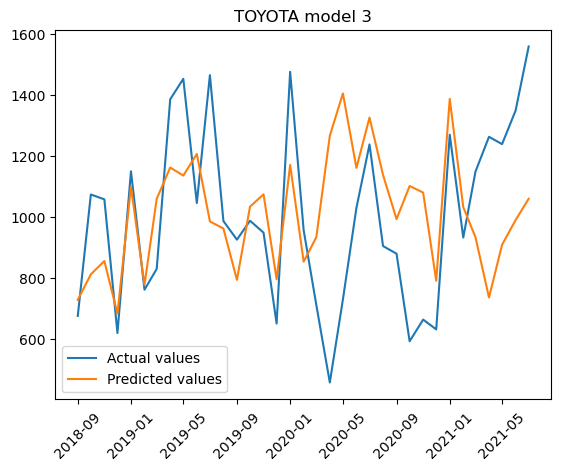

RMSE =  306.1588593446083
MAPE =  0.2769648749000619
MAE =  241.16021910486188


In [61]:
toyota=dataset['TOYOTA']
toyota.index=pd.to_datetime(toyota.index)
toyota.index = pd.DatetimeIndex(toyota.index.values,freq=toyota.index.inferred_freq)
toyota=pd.DataFrame(toyota)
toyota["#"]=list(range(len(toyota)))
test=(toyota.iloc[176:211]) 

f1=[]
for i in range(35):
    
    train=toyota.iloc[:165+i,0]
    model = pm.auto_arima(train, seasonal=True, m=12)
    print(model.get_params)
    forecasts = model.predict(12)
    f1.append(forecasts[-1])

f=pd.DataFrame(f1,index=test.index,columns=["forecast"])
plt.plot(test['TOYOTA'])
plt.plot(f)
plt.tick_params(axis='x', which='major',labelsize=10,labelrotation=45)
plt.title("TOYOTA model 3")
plt.legend(["Actual values","Predicted values"])
plt.savefig("/Users/loukas/Desktop/par/TOYOTA_model03.png",bbox_inches='tight')
plt.show()

print("RMSE = ",np.sqrt(mean_squared_error(test['TOYOTA'],f)))
print("MAPE = ",mean_absolute_percentage_error(test['TOYOTA'],f))
print('MAE = ',mean_absolute_error(test['TOYOTA'],f))   

scores['model_3']=[np.sqrt(mean_squared_error(toyota_test['TOYOTA'],f)),mean_absolute_percentage_error(toyota_test['TOYOTA'],f),mean_absolute_error(toyota_test['TOYOTA'],f)]    

## model_4 TOYOTA AR model St=βο+β1*S(t-12)+β2*S(t-1)+εt

A simple Auto-regressive model according to the formula above

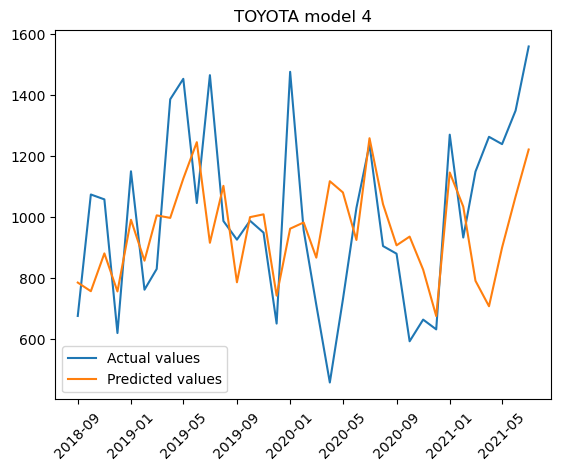

RMSE =  275.99422123678454
MAPE =  0.2356262618281234
MAE =  219.79357049047286


In [62]:
toyota=pd.DataFrame(dataset['TOYOTA'])
toyota1=toyota['TOYOTA'].shift(periods=1)
toyota12=toyota['TOYOTA'].shift(periods=12)

bltoyota=pd.DataFrame(toyota).join([pd.DataFrame(toyota1).rename(columns={'TOYOTA':'toyota-1'}),pd.DataFrame(toyota12).rename(columns={'TOYOTA':'toyota-12'})])

y=bltoyota['TOYOTA'][12:].astype('int')
X=bltoyota[['toyota-1','toyota-12']][12:].astype('int')


X_train=X.iloc[:164]
X_test=X.iloc[164:]
y_train=y.iloc[:164]
y_test=y.iloc[164:]


reg = LinearRegression().fit(X_train, y_train)
y_pred=reg.predict(X_test)

plt.plot(pd.DataFrame(y_test,index=y_test.index))
plt.plot(pd.DataFrame(y_pred,index=y_test.index))
plt.tick_params(axis='x', which='major',labelsize=10,labelrotation=45)
plt.title("TOYOTA model 4")
plt.legend(["Actual values","Predicted values"])
plt.savefig("/Users/loukas/Desktop/par/TOYOTA_model04.png",bbox_inches='tight')
plt.show()


print('RMSE = ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAPE = ',mean_absolute_percentage_error(y_test,y_pred))
print('MAE = ', mean_absolute_error(y_test,y_pred))

scores['model_4']=[np.sqrt(mean_squared_error(y_test,y_pred)),mean_absolute_percentage_error(y_test,y_pred),mean_absolute_error(y_test,y_pred)]    

In [63]:
len(y_pred)

35

# Advanced Models with and without Google Trends data

##### Machine learning models with and without the insertion of Google Trends Data in order to realize if their contribution concerning the accuracy was important or not.

In [64]:
ds=dataset.loc[:,["TOYOTA","gt1_toyota","gt2_toyota"]+list(dataset.columns[-14:])]

ds["TOYOTA+12"]=ds["TOYOTA"].shift(-12)

ds1=ds.loc[:"2020-07",:]

ds1.tail(15)

,TOYOTA,gt1_toyota,gt2_toyota,gt2_audi,gt2_opel,gt2_ford,gt2_fiat,unemployment,Qgdp_Maverage,gas_wt,gas_wot,gd_at,gt_crisisTh,gt_memTh,gt_debtTh,gt_cuts,gt_fir,TOYOTA+12
date,,,,,,,,,,,,,,,,,,
2019-05,1452,51,57,47,29,55,50,0.167384,15356.598024,1645.500000,614.872500,830.24,4,4,9,18,25,729.0
2019-06,1045,48,64,53,25,55,49,0.157003,15356.598024,1611.000000,587.837500,868.48,3,4,13,0,15,1029.0
2019-07,1464,56,62,58,23,44,48,0.166851,16683.674731,1616.200000,591.592000,899.93,2,3,9,8,6,1237.0
2019-08,986,62,76,61,31,62,54,0.164840,16683.674731,1609.750000,586.937500,868.10,3,1,6,0,29,904.0
2019-09,925,79,80,67,29,51,51,0.158697,16683.674731,1599.200000,578.272000,868.42,2,2,3,8,22,879.0
2019-10,987,63,66,52,26,53,48,0.162700,15247.076056,1592.500000,573.045000,882.57,2,1,12,0,14,592.0
2019-11,948,55,62,52,30,55,46,0.171158,15247.076056,1587.500000,568.800000,901.58,6,1,11,0,14,663.0
2019-12,650,55,63,53,27,57,45,0.167019,15247.076056,1594.333333,574.423333,916.67,4,2,2,9,49,631.0
2020-01,1475,67,77,51,30,65,53,0.171878,13520.369730,1619.250000,594.012500,921.21,6,3,8,8,36,1269.0


In [65]:
index1=ds[-35:].index
ind=pd.DatetimeIndex(index1)

## model_5 TOYOTA DecisionTreeRegressor with Google Trends

##### Decision Tree Regression from scikit-learn independent variables: past sales, Google Trends, unemployment, GDP. Maximum Tree Depth = 4. For Train set was selected a subset of the initial trainset to smooth the outliers.

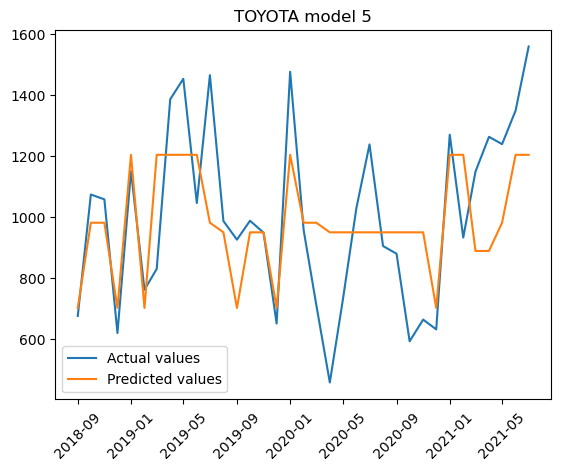

RMSE =  228.30799423856396
MAPE =  0.2014564491973769
MAE =  182.60816326530613


In [66]:
Y=ds1["TOYOTA+12"]
X=ds1[[  'TOYOTA','gt1_toyota','gt2_toyota','unemployment','Qgdp_Maverage', 'gt_fir']]

y_test=Y[-35:]
X_test=X[-35:]

y_train=Y[120:-35]
X_train=X[120:-35]

tree=DecisionTreeRegressor(random_state=0,max_depth=4)   ###### να θυμηθω να βρω αποτελέσματα και για χωρις google trends μεταβλητες
tree.fit(X_train,y_train)

y_pred=tree.predict(X_test)

plt.plot(pd.DataFrame(list(y_test),index=ind))
plt.plot(pd.DataFrame(y_pred,index=ind))
plt.tick_params(axis='x', which='major',labelsize=10,labelrotation=45)
plt.title("TOYOTA model 5")
plt.legend(["Actual values","Predicted values"])
plt.savefig("/Users/loukas/Desktop/par/TOYOTA_model05.png",bbox_inches='tight')
plt.show()

print('RMSE = ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAPE = ',mean_absolute_percentage_error(y_test,y_pred))
print('MAE = ', mean_absolute_error(y_test,y_pred))

scores['model_5']=[np.sqrt(mean_squared_error(y_test,y_pred)),mean_absolute_percentage_error(y_test,y_pred),mean_absolute_error(y_test,y_pred)]    

## model_6 TOYOTA DecisionTreeRegressor without Google Trends

##### Decision Tree Regression from scikit-learn independent variables: past sales, unemployment, GDP. Maximum Tree Depth = 4. For Train set was selected a subset of the initial trainset to smooth the outliers.

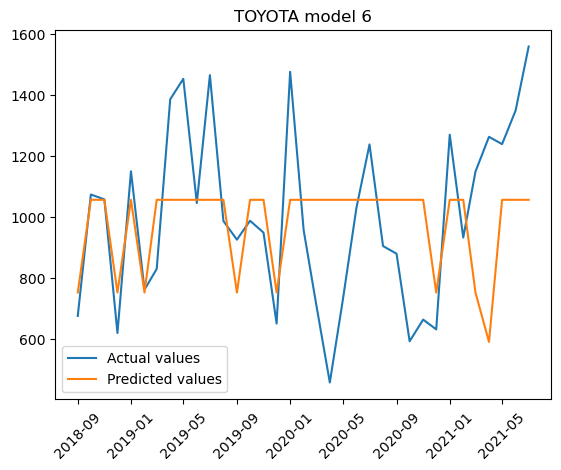

RMSE =  285.8365944559211
MAPE =  0.24894643920452367
MAE =  225.92380952380952


In [67]:
Y=ds1["TOYOTA+12"]
X=ds1[[  'TOYOTA','unemployment','Qgdp_Maverage']]

y_test=Y[-35:]
X_test=X[-35:]

y_train=Y[120:-35]
X_train=X[120:-35]

tree=DecisionTreeRegressor(random_state=0,max_depth=4)   ###### να θυμηθω να βρω αποτελέσματα και για χωρις google trends μεταβλητες
tree.fit(X_train,y_train)

y_pred=tree.predict(X_test)

plt.plot(pd.DataFrame(list(y_test),index=ind))
plt.plot(pd.DataFrame(y_pred,index=ind))
plt.tick_params(axis='x', which='major',labelsize=10,labelrotation=45)
plt.title("TOYOTA model 6")
plt.legend(["Actual values","Predicted values"])
plt.savefig("/Users/loukas/Desktop/par/TOYOTA_model06.png",bbox_inches='tight')
plt.show()

print('RMSE = ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAPE = ',mean_absolute_percentage_error(y_test,y_pred))
print('MAE = ', mean_absolute_error(y_test,y_pred))

scores['model_6']=[np.sqrt(mean_squared_error(y_test,y_pred)),mean_absolute_percentage_error(y_test,y_pred),mean_absolute_error(y_test,y_pred)]    

## model_7 TOYOTA RandomForestRegressor with Google Trends

Randof Forest Regression from scikit-learn independent variables: Google Trends, past sales, unemployment, GDP. Maximum depth=4

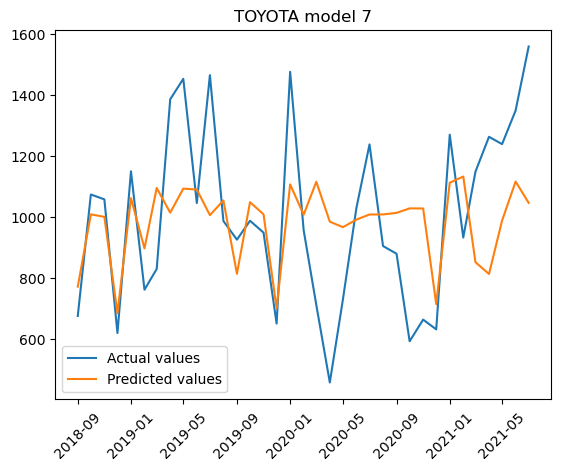

RMSE =  262.1833530121541
MAPE =  0.2317602357725324
MAE =  212.31671535923462


In [68]:
Y=ds1["TOYOTA+12"]
X=ds1[[  'TOYOTA','gt1_toyota','gt2_toyota','unemployment','Qgdp_Maverage', 'gt_fir']]

y_test=Y[-35:]
X_test=X[-35:]

y_train=Y[120:-35]
X_train=X[120:-35]

forest=RandomForestRegressor(random_state=0,max_depth=4)   ###### να θυμηθω να βρω αποτελέσματα και για χωρις google trends μεταβλητες
forest.fit(X_train,y_train)

y_pred=forest.predict(X_test)

plt.plot(pd.DataFrame(list(y_test),index=ind))
plt.plot(pd.DataFrame(y_pred,index=ind))
plt.tick_params(axis='x', which='major',labelsize=10,labelrotation=45)
plt.title("TOYOTA model 7")
plt.legend(["Actual values","Predicted values"])
plt.savefig("/Users/loukas/Desktop/par/TOYOTA_model07.png",bbox_inches='tight')
plt.show()

print('RMSE = ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAPE = ',mean_absolute_percentage_error(y_test,y_pred))
print('MAE = ', mean_absolute_error(y_test,y_pred))

scores['model_7']=[np.sqrt(mean_squared_error(y_test,y_pred)),mean_absolute_percentage_error(y_test,y_pred),mean_absolute_error(y_test,y_pred)]    

## model_8 TOYOTA RandomForestRegressor without Google Trends

Randof Forest Regression from scikit-learn independent variables: past sales, unemployment, GDP. Maximum depth=4

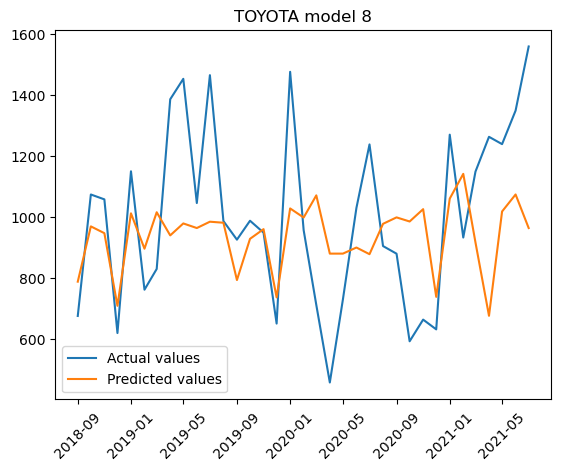

RMSE =  280.9302008101369
MAPE =  0.23581198890967825
MAE =  226.89991164192946


In [69]:
Y=ds1["TOYOTA+12"]
X=ds1[[  'TOYOTA','unemployment','Qgdp_Maverage']]

y_test=Y[-35:]
X_test=X[-35:]

y_train=Y[120:-35]
X_train=X[120:-35]

forest=RandomForestRegressor(random_state=0,max_depth=4)   ###### να θυμηθω να βρω αποτελέσματα και για χωρις google trends μεταβλητες
forest.fit(X_train,y_train)

y_pred=forest.predict(X_test)

plt.plot(pd.DataFrame(list(y_test),index=ind))
plt.plot(pd.DataFrame(y_pred,index=ind))
plt.tick_params(axis='x', which='major',labelsize=10,labelrotation=45)
plt.title("TOYOTA model 8")
plt.legend(["Actual values","Predicted values"])
plt.savefig("/Users/loukas/Desktop/par/TOYOTA_model08.png",bbox_inches='tight')
plt.show()

print('RMSE = ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAPE = ',mean_absolute_percentage_error(y_test,y_pred))
print('MAE = ', mean_absolute_error(y_test,y_pred))

scores['model_8']=[np.sqrt(mean_squared_error(y_test,y_pred)),mean_absolute_percentage_error(y_test,y_pred),mean_absolute_error(y_test,y_pred)]    

## model_9 TOYOTA Linear Regression with Google Trends

Linear Regression with independent variables: Google Trends,  past sales, GDP, unemployment

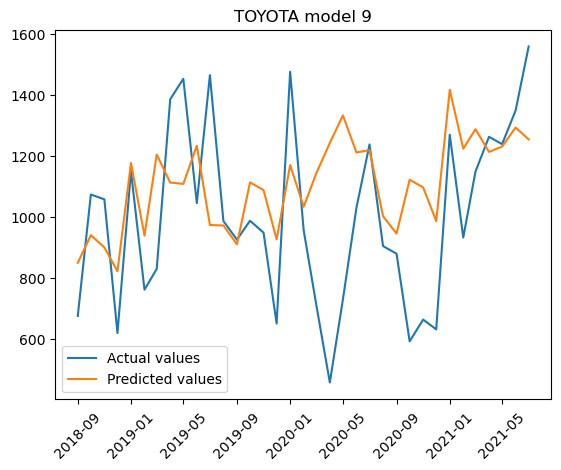

RMSE =  292.6745113077598
MAPE =  0.28574195708130284
MAE =  228.3165025375532


In [70]:
####### dataset8


Y=ds1["TOYOTA+12"]
X=ds1[['TOYOTA', 'gt1_toyota', 'Qgdp_Maverage', 'unemployment']]

#####subtrain1

y_test=Y[-35:]
X_test=X[-35:]

y_train=Y[120:-35]
X_train=X[120:-35]

reg = LinearRegression().fit(X_train, y_train)
y_pred=reg.predict(X_test)

plt.plot(pd.DataFrame(list(y_test),index=ind))
plt.plot(pd.DataFrame(y_pred,index=ind))
plt.tick_params(axis='x', which='major',labelsize=10,labelrotation=45)
plt.title("TOYOTA model 9")
plt.legend(["Actual values","Predicted values"])
plt.savefig("/Users/loukas/Desktop/par/TOYOTA_model09.png",bbox_inches='tight')
plt.show()

print('RMSE = ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAPE = ',mean_absolute_percentage_error(y_test,y_pred))
print('MAE = ', mean_absolute_error(y_test,y_pred))

scores['model_9']=[np.sqrt(mean_squared_error(y_test,y_pred)),mean_absolute_percentage_error(y_test,y_pred),mean_absolute_error(y_test,y_pred)]    

## model_10 TOYOTA Linear Regression without Google Trends

Linear Regression without Google Trends independent variables: past sales, GDP, unemployment

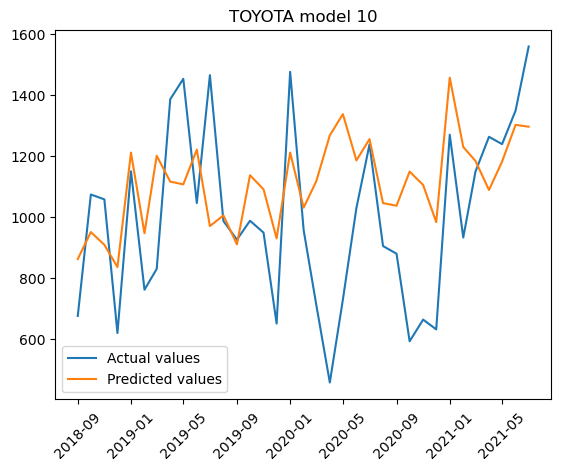

RMSE =  296.32725122216203
MAPE =  0.2944867543242312
MAE =  234.91585523226328


In [71]:
Y=ds1["TOYOTA+12"]
X=ds1[['TOYOTA','Qgdp_Maverage', 'unemployment']]

#####subtrain1

y_test=Y[-35:]
X_test=X[-35:]

y_train=Y[120:-35]
X_train=X[120:-35]

reg = LinearRegression().fit(X_train, y_train)
y_pred=reg.predict(X_test)

plt.plot(pd.DataFrame(list(y_test),index=ind))
plt.plot(pd.DataFrame(y_pred,index=ind))
plt.tick_params(axis='x', which='major',labelsize=10,labelrotation=45)
plt.title("TOYOTA model 10")
plt.legend(["Actual values","Predicted values"])
plt.savefig("/Users/loukas/Desktop/par/TOYOTA_model10.png",bbox_inches='tight')
plt.show()

print('RMSE = ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAPE = ',mean_absolute_percentage_error(y_test,y_pred))
print('MAE = ', mean_absolute_error(y_test,y_pred))

scores['model_10']=[np.sqrt(mean_squared_error(y_test,y_pred)),mean_absolute_percentage_error(y_test,y_pred),mean_absolute_error(y_test,y_pred)]    

## model_11 TOYOTA Support Vector Regressor with Google Trends

Support Vector Regression with independent variables Google Trends, GDP, unemployment, past sales

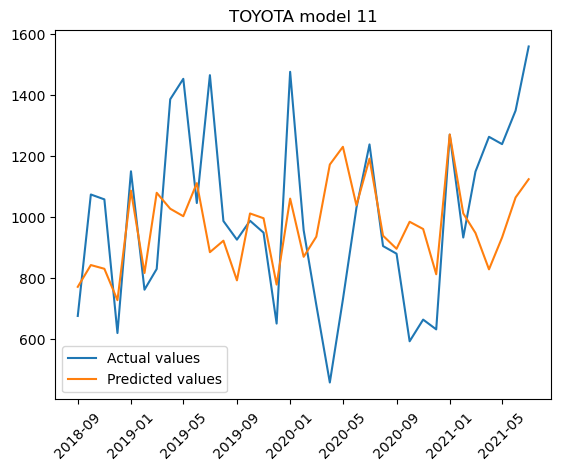

RMSE =  281.6045635330925
MAPE =  0.24163825565908748
MAE =  215.30380673703795


In [72]:
####### dataset10


Y=ds1["TOYOTA+12"]
X=ds1[['TOYOTA','gt1_toyota','Qgdp_Maverage', 'unemployment']]

#####subtrain1

y_test=Y[-35:]
X_test=X[-35:]

y_train=Y[120:-35]
X_train=X[120:-35]

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

regr = make_pipeline(StandardScaler(), SVR(C=15, epsilon=0.4,kernel="linear"))
regr.fit(X_train, y_train)
y_pred=regr.predict(X_test)

plt.plot(pd.DataFrame(list(y_test),index=ind))
plt.plot(pd.DataFrame(y_pred,index=ind))
plt.tick_params(axis='x', which='major',labelsize=10,labelrotation=45)
plt.title("TOYOTA model 11")
plt.legend(["Actual values","Predicted values"])
plt.savefig("/Users/loukas/Desktop/par/TOYOTA_model11.png",bbox_inches='tight')
plt.show()

print('RMSE = ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAPE = ',mean_absolute_percentage_error(y_test,y_pred))
print('MAE = ', mean_absolute_error(y_test,y_pred))

scores['model_11']=[np.sqrt(mean_squared_error(y_test,y_pred)),mean_absolute_percentage_error(y_test,y_pred),mean_absolute_error(y_test,y_pred)]    

## model_12 TOYOTA Support Vector Regressor without Google Trends

Support Vector Regression without Google Trends independent variables: GDP, unemployment, past sales

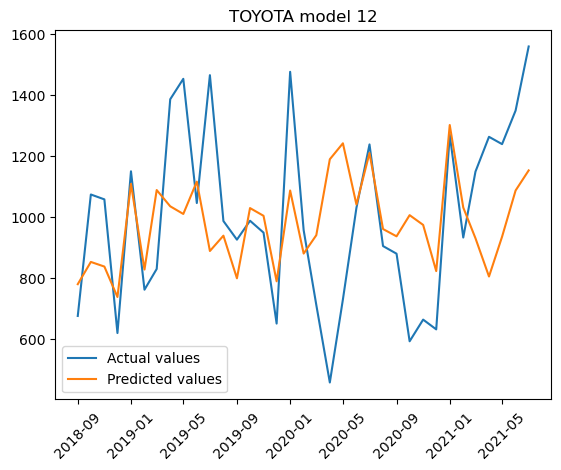

RMSE =  283.03321239371223
MAPE =  0.24833015950109236
MAE =  218.85934898965152


In [73]:
####### dataset10


Y=ds1["TOYOTA+12"]
X=ds1[['TOYOTA','Qgdp_Maverage', 'unemployment']]

#####subtrain1

y_test=Y[-35:]
X_test=X[-35:]

y_train=Y[120:-35]
X_train=X[120:-35]

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

regr = make_pipeline(StandardScaler(), SVR(C=15, epsilon=0.4,kernel="linear"))
regr.fit(X_train, y_train)
y_pred=regr.predict(X_test)

plt.plot(pd.DataFrame(list(y_test),index=ind))
plt.plot(pd.DataFrame(y_pred,index=ind))
plt.tick_params(axis='x', which='major',labelsize=10,labelrotation=45)
plt.title("TOYOTA model 12")
plt.legend(["Actual values","Predicted values"])
plt.savefig("/Users/loukas/Desktop/par/TOYOTA_model12.png",bbox_inches='tight')
plt.show()
print('RMSE = ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAPE = ',mean_absolute_percentage_error(y_test,y_pred))
print('MAE = ', mean_absolute_error(y_test,y_pred))

scores['model_12']=[np.sqrt(mean_squared_error(y_test,y_pred)),mean_absolute_percentage_error(y_test,y_pred),mean_absolute_error(y_test,y_pred)]    

In [74]:
scores_toyota=scores

# For the rest of the car brands






AUDI AUDI AUDI AUDI AUDI AUDI AUDI AUDI AUDI AUDI AUDI AUDI AUDI



AUDI EXPONENTIAL SMOOTHING HOLT WINTERS


/Users/loukas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


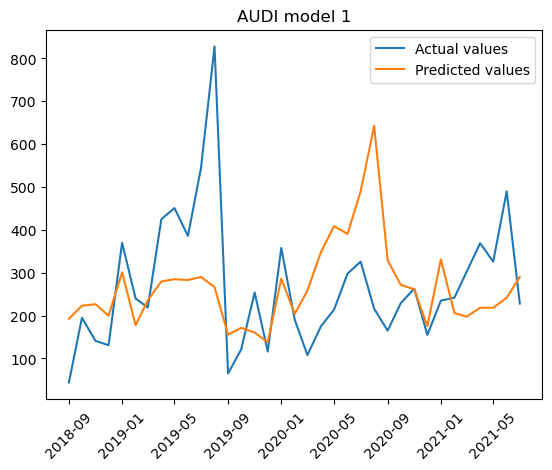

AUDI model_1
RMSE =  166.24302432296403
MAPE =  0.5647013303747487
MAE =  122.52042183838164



AUDI AUTO EXPONENTIAL SMOOTHING


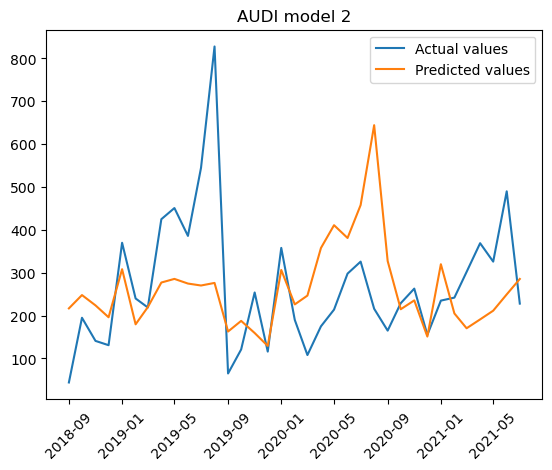

AUDI model_2
RMSE =  167.1734177775294
MAPE =  0.5821998784938682
MAE =  123.46139165780816



AUDI AUTO ARIMA
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1),

/Users/loukas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)>
<bound met

/Users/loukas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)>
<bound met

/Users/loukas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)>


/Users/loukas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)>


/Users/loukas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)>


/Users/loukas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)>


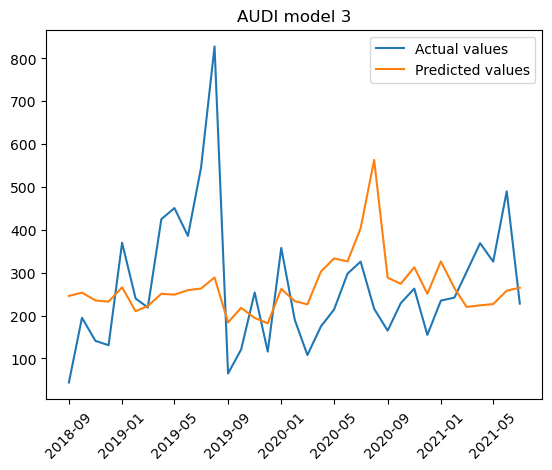

AUDI model_3
RMSE =  158.34749276834586
MAPE =  0.6061725162201738
MAE =  121.18479226218172



AUDI AR Baseline Model


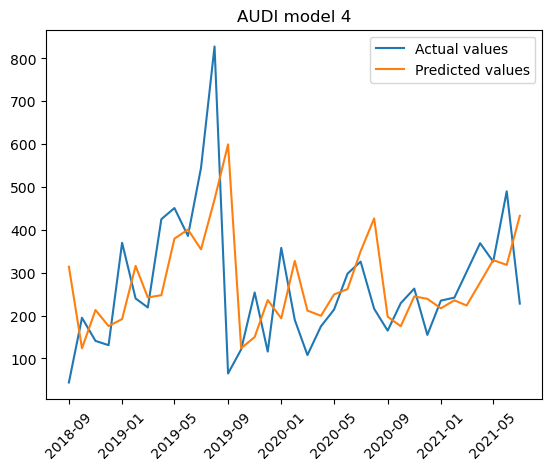

AUDI model_4
RMSE =  154.66752492903817
MAPE =  0.7395503707805199
MAE =  108.80614321310243



AUDI Decision Tree + gtrends


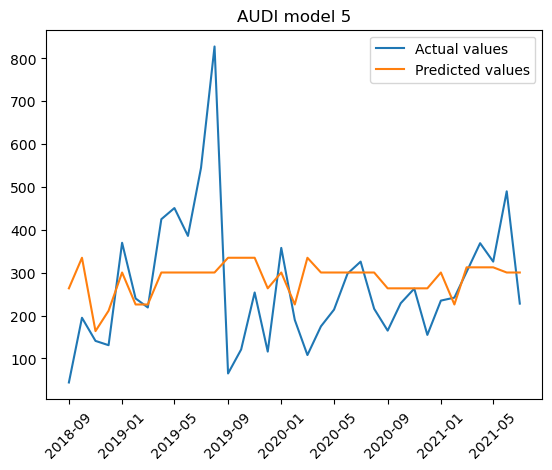

AUDI model_5
RMSE =  148.26155566730333
MAPE =  0.6570209952180133
MAE =  105.99428571428571



AUDI Decision Tree without gtrends


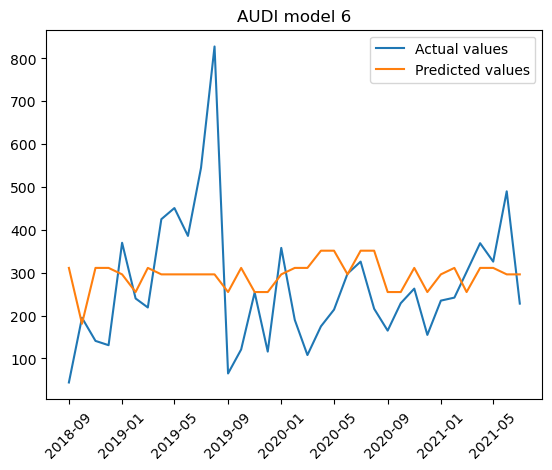

AUDI model_6
RMSE =  154.81025957039787
MAPE =  0.7209754870490558
MAE =  117.90238095238094



AUDI Random Forest + gtrends


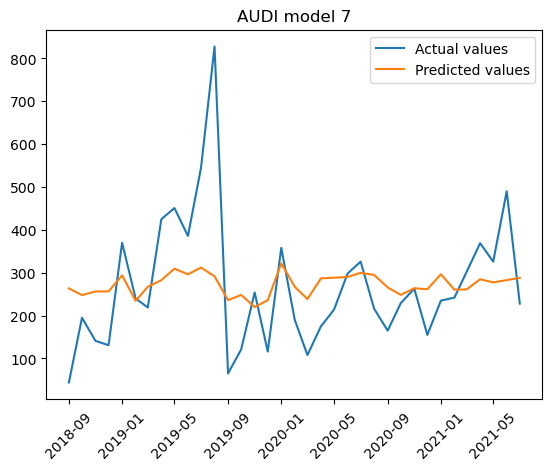

AUDI model_7
RMSE =  138.60474392080573
MAPE =  0.582675497263745
MAE =  100.85608581348622



AUDI Random Forest without gtrends


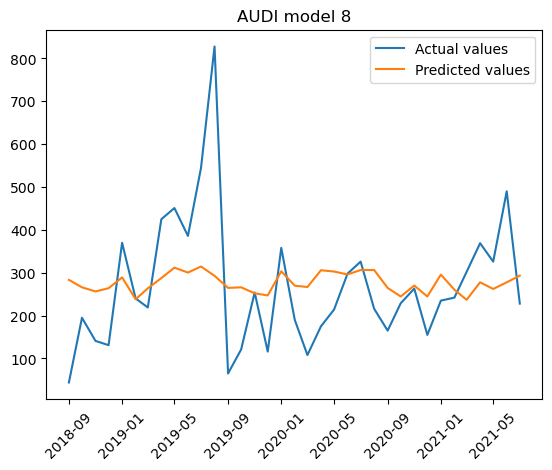

AUDI model_8
RMSE =  143.56534700457792
MAPE =  0.6309097066580561
MAE =  105.87097317206603



AUDI Linear Regression with gtrends


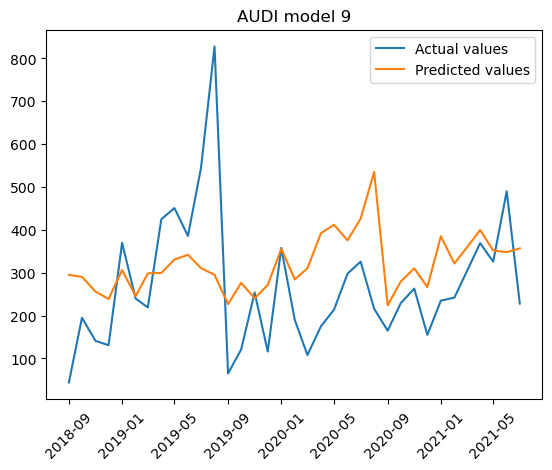

AUDI model_9
RMSE =  160.22225960806398
MAPE =  0.7301621657175206
MAE =  124.41216641843798



AUDI Linear Regression without gtrends


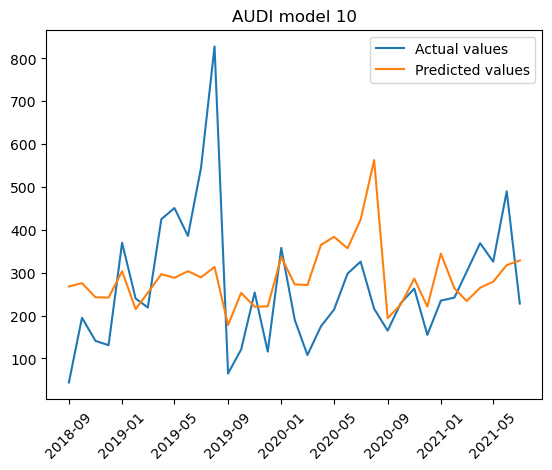

AUDI model_10
RMSE =  152.6598387912943
MAPE =  0.6298257448457962
MAE =  115.5954454322914



AUDI SVR with gtrends


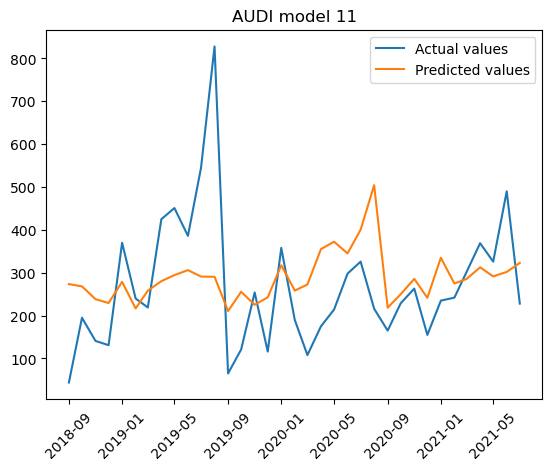

AUDI model_11
RMSE =  151.3852936784946
MAPE =  0.6385365475381433
MAE =  113.98347660724002



AUDI SVR without gtrends


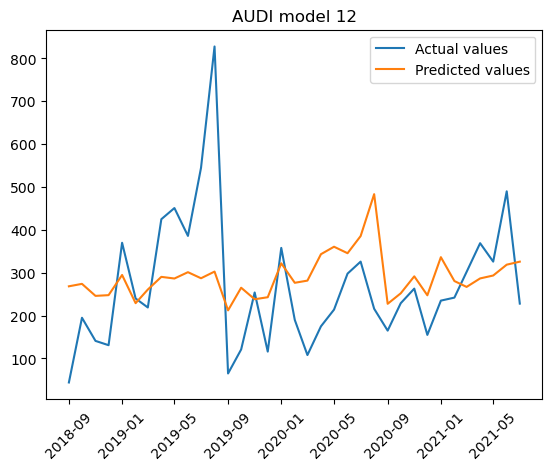

AUDI model_12
RMSE =  149.47151549952838
MAPE =  0.6454275618497375
MAE =  114.44753374750105





OPEL OPEL OPEL OPEL OPEL OPEL OPEL OPEL OPEL OPEL OPEL OPEL OPEL



OPEL EXPONENTIAL SMOOTHING HOLT WINTERS


/Users/loukas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


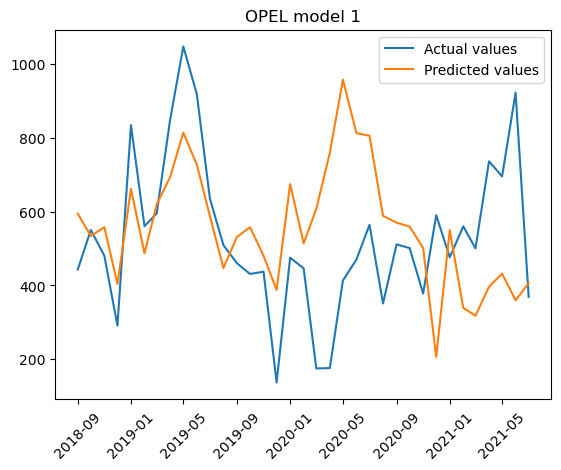

OPEL model_1
RMSE =  247.39501154751622
MAPE =  0.5045358109939839
MAE =  193.09705153749778



OPEL AUTO EXPONENTIAL SMOOTHING


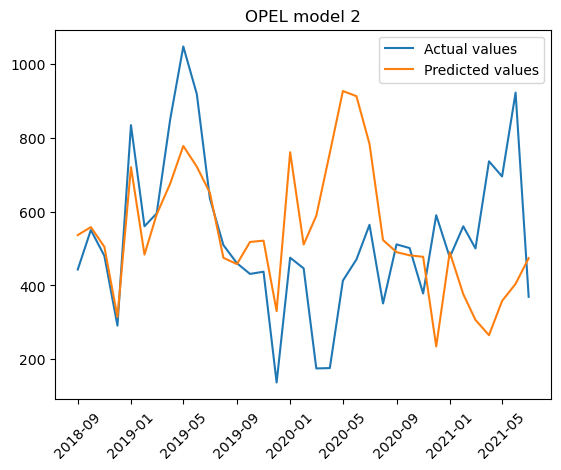

OPEL model_2
RMSE =  249.56527367384322
MAPE =  0.4672948492844947
MAE =  183.11406271623295



OPEL AUTO ARIMA
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1)

/Users/loukas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>


/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(2,1,1)(2,0,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/arima.py", line 482, in fit
    self._fit(y, X, **fit_args)
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/arima.py", line 403, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/arima.py", line 397, in _fit_wrapper
    **fit_args)
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/mlemodel.py", line 695, in fit
    skip_hessian=True, **kwargs)
 

<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>


/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(3,1,1)(1,0,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/arima.py", line 482, in fit
    self._fit(y, X, **fit_args)
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/arima.py", line 403, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/arima.py", line 397, in _fit_wrapper
    **fit_args)
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/mlemodel.py", line 695, in fit
    skip_hessian=True, **kwargs)
 

<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(3, 1, 1), scoring_args={}, seasonal_order=(2, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(4, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>


/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(2,1,1)(2,0,2)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/arima.py", line 482, in fit
    self._fit(y, X, **fit_args)
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/arima.py", line 403, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/arima.py", line 397, in _fit_wrapper
    **fit_args)
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/mlemodel.py", line 695, in fit
    skip_hessian=True, **kwargs)
 

<bound method BaseEstimator.get_params of ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>


/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(2,1,1)(2,0,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/arima.py", line 482, in fit
    self._fit(y, X, **fit_args)
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/arima.py", line 403, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/arima.py", line 397, in _fit_wrapper
    **fit_args)
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/mlemodel.py", line 695, in fit
    skip_hessian=True, **kwargs)
 

<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>


/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(3,1,0)(2,0,2)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/arima.py", line 482, in fit
    self._fit(y, X, **fit_args)
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/arima.py", line 403, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/arima.py", line 397, in _fit_wrapper
    **fit_args)
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/mlemodel.py", line 695, in fit
    skip_hessian=True, **kwargs)
 

<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(3, 1, 0), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(3, 1, 0), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound met

/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(3,1,1)(1,0,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/arima.py", line 482, in fit
    self._fit(y, X, **fit_args)
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/arima.py", line 403, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/arima.py", line 397, in _fit_wrapper
    **fit_args)
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/mlemodel.py", line 695, in fit
    skip_hessian=True, **kwargs)
 

<bound method BaseEstimator.get_params of ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>


/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(2,1,1)(2,0,2)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/arima.py", line 482, in fit
    self._fit(y, X, **fit_args)
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/arima.py", line 403, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/pmdarima/arima/arima.py", line 397, in _fit_wrapper
    **fit_args)
  File "/Users/loukas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/mlemodel.py", line 695, in fit
    skip_hessian=True, **kwargs)
 

<bound method BaseEstimator.get_params of ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>


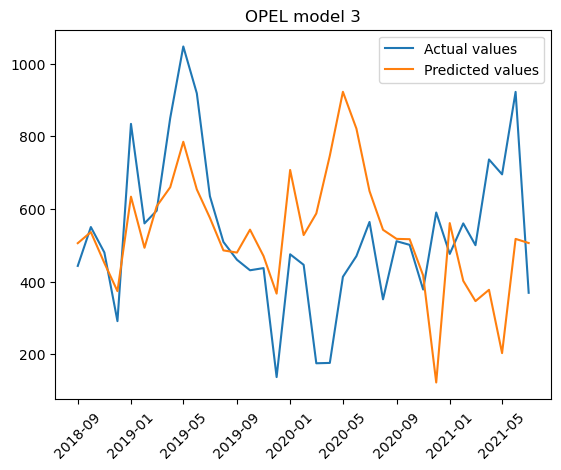

OPEL model_3
RMSE =  245.79104342228928
MAPE =  0.4715881443667917
MAE =  183.22772247070105



OPEL AR Baseline Model


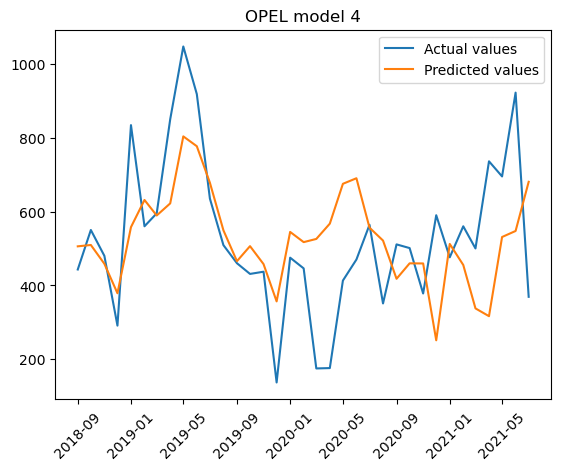

OPEL model_4
RMSE =  194.71310321924636
MAPE =  0.3857413899771163
MAE =  150.08754037048467



OPEL Decision Tree + gtrends


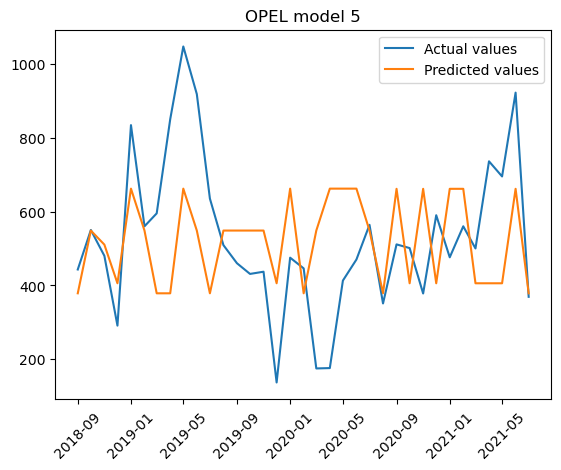

OPEL model_5
RMSE =  223.67273692636215
MAPE =  0.4491923884687629
MAE =  180.05108225108225



OPEL Decision Tree without gtrends


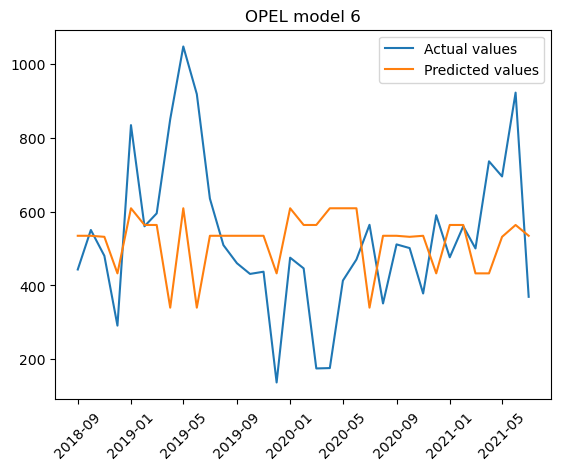

OPEL model_6
RMSE =  229.45920814838013
MAPE =  0.43731949952468446
MAE =  174.72612244897957



OPEL Random Forest + gtrends


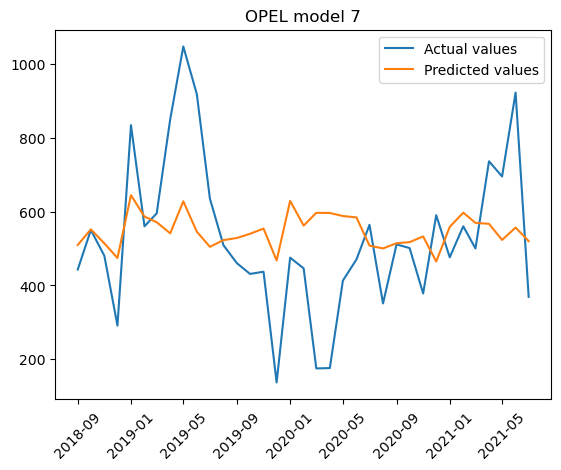

OPEL model_7
RMSE =  197.88949687338595
MAPE =  0.4153891448007725
MAE =  152.71860147250774



OPEL Random Forest without gtrends


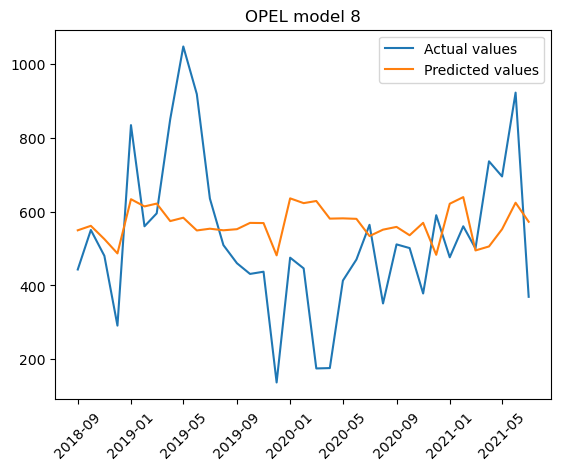

OPEL model_8
RMSE =  206.01899737037195
MAPE =  0.4489093313715776
MAE =  164.74431284454653



OPEL Linear Regression with gtrends


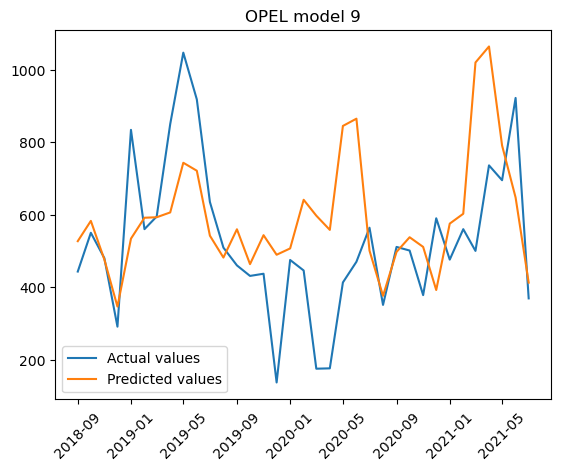

OPEL model_9
RMSE =  219.95363977111103
MAPE =  0.4352645501023759
MAE =  162.75924087033334



OPEL Linear Regression without gtrends


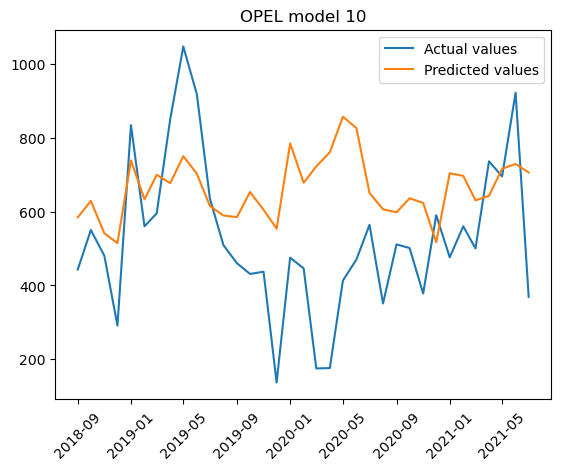

OPEL model_10
RMSE =  243.10916092074152
MAPE =  0.5915656401443449
MAE =  199.6355278493843



OPEL SVR with gtrends


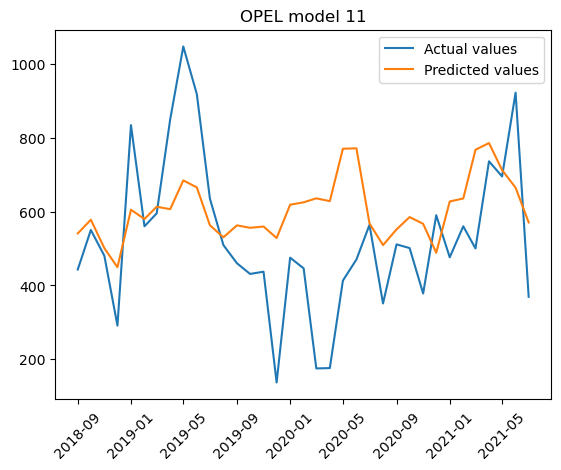

OPEL model_11
RMSE =  208.41239409692514
MAPE =  0.4742821933900577
MAE =  164.40979715846666



OPEL SVR without gtrends


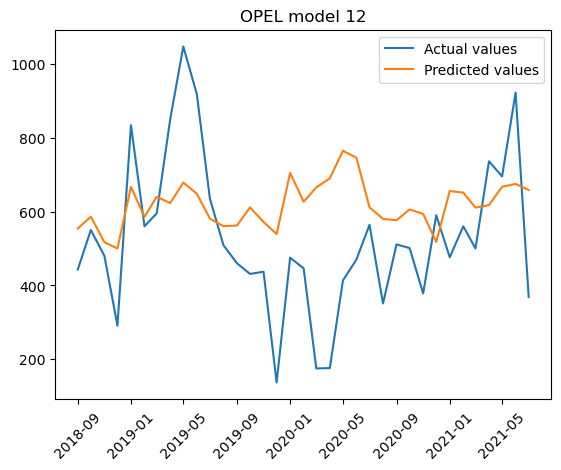

OPEL model_12
RMSE =  220.45214733730788
MAPE =  0.5212219824083141
MAE =  178.8816499903913





FORD FORD FORD FORD FORD FORD FORD FORD FORD FORD FORD FORD FORD



FORD EXPONENTIAL SMOOTHING HOLT WINTERS


/Users/loukas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


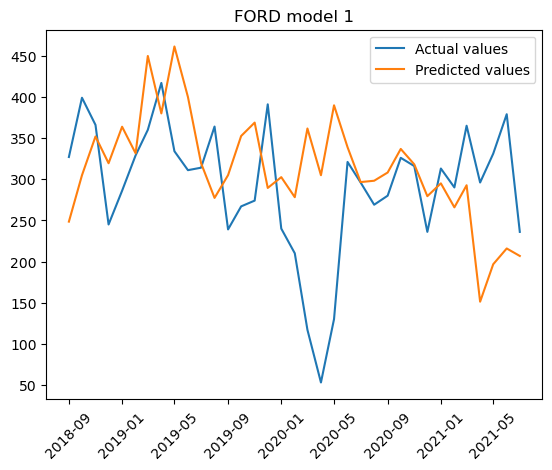

FORD model_1
RMSE =  103.49043516486462
MAPE =  0.4361984396636019
MAE =  77.9949184439769



FORD AUTO EXPONENTIAL SMOOTHING


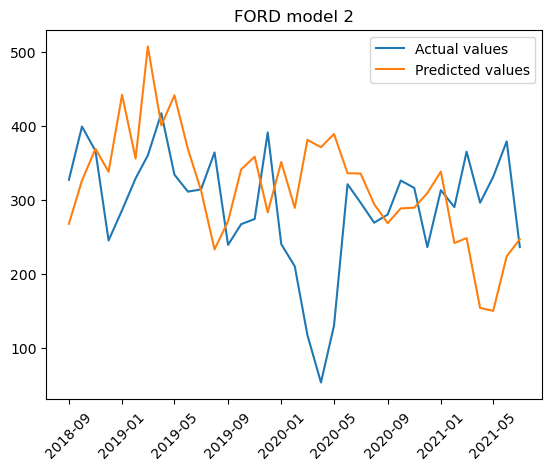

FORD model_2
RMSE =  117.37518090759079
MAPE =  0.5044463853683888
MAE =  88.84923571388023



FORD AUTO ARIMA
<bound method BaseEstimator.get_params of ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>


/Users/loukas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


<bound method BaseEstimator.get_params of ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound method BaseEstimator.get_params of ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>
<bound met

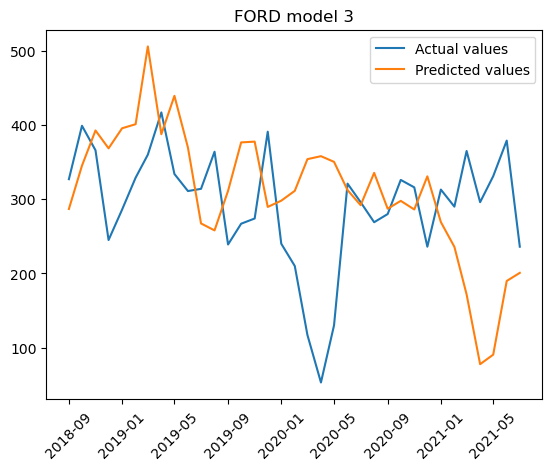

FORD model_3
RMSE =  123.91718082327414
MAPE =  0.5220757125284275
MAE =  98.29439152424645



FORD AR Baseline Model


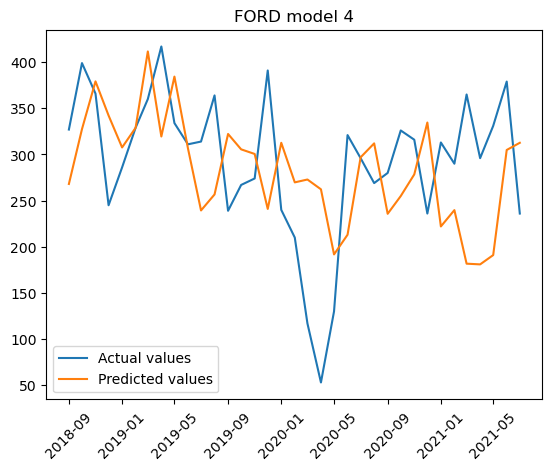

FORD model_4
RMSE =  89.9411911594503
MAPE =  0.37054938910483953
MAE =  75.4230612866343



FORD Decision Tree + gtrends


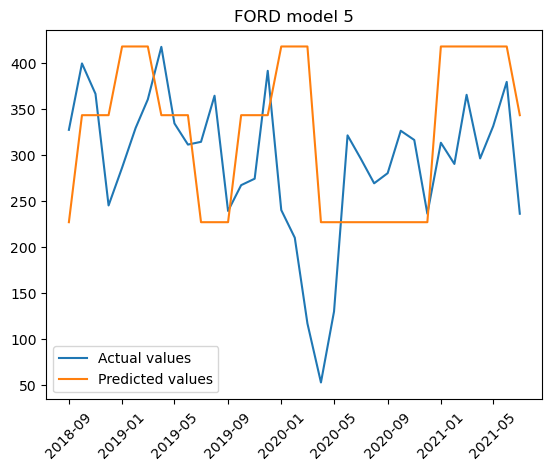

FORD model_5
RMSE =  107.31341490885634
MAPE =  0.4407961384430631
MAE =  89.94507936507937



FORD Decision Tree without gtrends


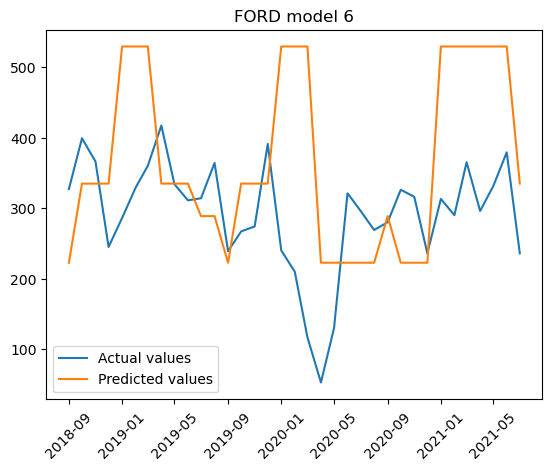

FORD model_6
RMSE =  156.99557798847874
MAPE =  0.5673665211896977
MAE =  123.65238095238097



FORD Random Forest + gtrends


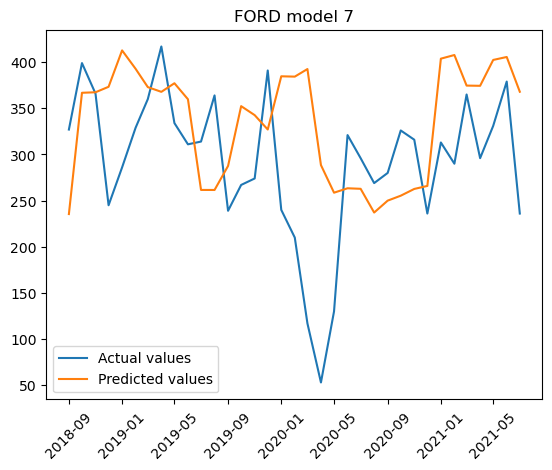

FORD model_7
RMSE =  100.06203139041097
MAPE =  0.44096518686253733
MAE =  80.32263773833624



FORD Random Forest without gtrends


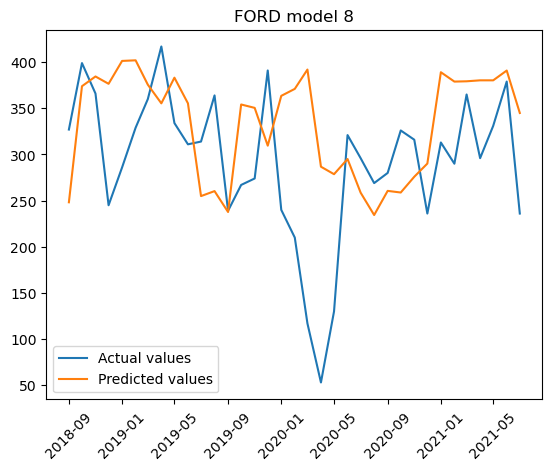

FORD model_8
RMSE =  96.74730710323189
MAPE =  0.4274170204311648
MAE =  76.48344988939631



FORD Linear Regression with gtrends


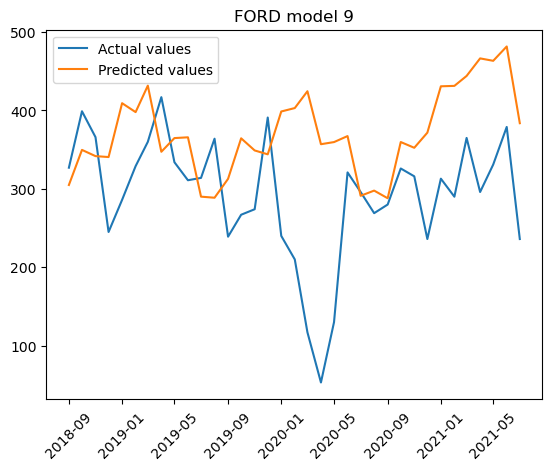

FORD model_9
RMSE =  121.98493373174439
MAPE =  0.5436773447777004
MAE =  96.60628057632591



FORD Linear Regression without gtrends


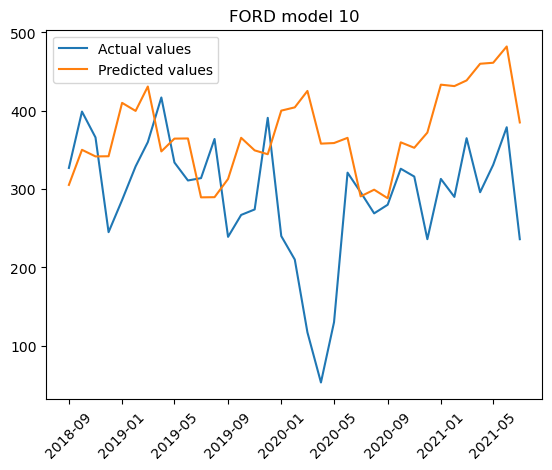

FORD model_10
RMSE =  121.97635727449885
MAPE =  0.5442259576960512
MAE =  96.51801051750125



FORD SVR with gtrends


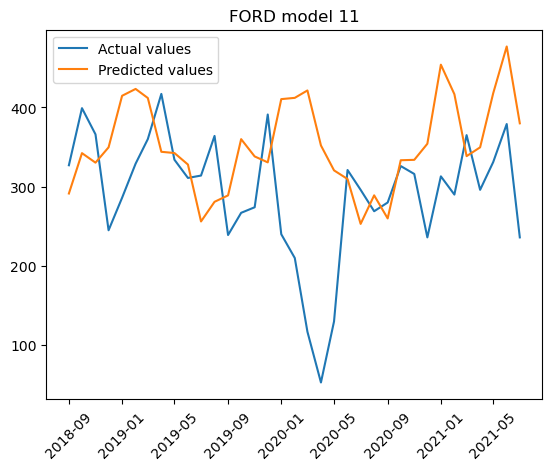

FORD model_11
RMSE =  114.91101414013808
MAPE =  0.5092802464845749
MAE =  88.40620937279502



FORD SVR without gtrends


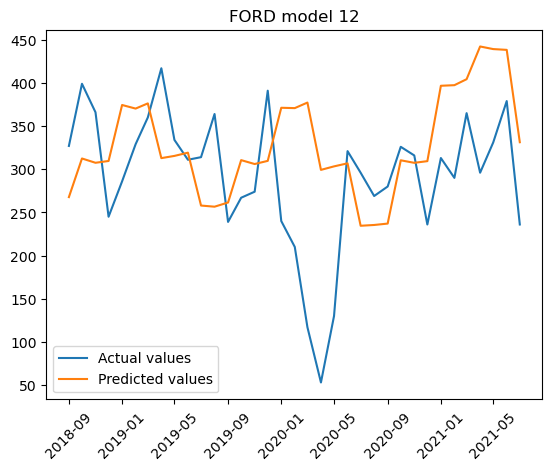

FORD model_12
RMSE =  99.17906136971817
MAPE =  0.4356605007269836
MAE =  78.55857159295465


In [75]:
sc=[]
sc.append(scores_toyota)
for k in ['AUDI','OPEL','FORD']:
    print("")
    print("")
    print("")
    print("")
    print("")
    print(k,k,k,k,k,k,k,k,k,k,k,k,k)



    


    z=dataset[k]
    z.index=pd.to_datetime(z.index)
    z.index = pd.DatetimeIndex(z.index.values,freq=z.index.inferred_freq)
    z=pd.DataFrame(z)
    z["#"]=list(range(len(z)))
    test=(z.iloc[176:211]) 

    scores={}

    #### Exponential smoothing
    print("")
    print("")
    print("")
    print(k,"EXPONENTIAL SMOOTHING HOLT WINTERS")

    z=dataset[k]
    z.index=pd.to_datetime(z.index)
    z.index = pd.DatetimeIndex(z.index.values,freq=z.index.inferred_freq)
    z=pd.DataFrame(z)
    z["#"]=list(range(len(z)))
    test=(z.iloc[176:211]) 

    f1=[]
    for i in range(35):
        train=z.iloc[:165+i,0]
        fit1 = sm.tsa.ExponentialSmoothing(train,seasonal_periods=12,seasonal="add",use_boxcox=False, initialization_method="estimated").fit()
        fcast1 = fit1.forecast(12)
        f1.append(fcast1[11])




    f=pd.DataFrame(f1,index=test.index,columns=["forecast"])
    if np.inf in list(f["forecast"]):
        f.replace([np.inf, -np.inf], train.mean(), inplace=True)
    f.fillna(train.mean(),inplace=True)



    plt.plot(test[k])
    plt.plot(f)
    plt.tick_params(axis='x', which='major',labelsize=10,labelrotation=45)
    plt.title(k+" model 1")
    plt.legend(["Actual values","Predicted values"])
    plt.savefig("/Users/loukas/Desktop/par/"+k+"_model01.png",bbox_inches='tight')
    plt.show()
    
    print(k,'model_1')

    print("RMSE = ",np.sqrt(mean_squared_error(test[k],f)))
    print("MAPE = ",mean_absolute_percentage_error(test[k],f))
    print('MAE = ',mean_absolute_error(test[k],f))

    scores['model_1']=[np.sqrt(mean_squared_error(test[k],f)),mean_absolute_percentage_error(test[k],f),mean_absolute_error(test[k],f)]    

    ######### AUTOETS
    print("")
    print("")
    print("")
    print(k,"AUTO EXPONENTIAL SMOOTHING")


    
    from sktime.forecasting.ets import AutoETS

    z=pd.DataFrame(dataset[k])
    z.index=idx =pd.period_range(start='2004-01', end='2021-07', freq='M')
    z=pd.DataFrame(z,columns=[k])
    z[k]=z[k].astype("float64")
    test=z.iloc[-35:,0]
    f1=[]
    for i in range(35):
        train=z.iloc[:165+i,0]
        fit1 = AutoETS(auto=True, n_jobs=-1, sp=12).fit(train)
        fcast1 = fit1.predict(12)
        f1.append(fcast1[-1])






    f=pd.DataFrame(f1,index=test.index,columns=["forecast"])
    if np.inf in list(f["forecast"]):
        f.replace([np.inf, -np.inf], train.mean(), inplace=True)
    f.fillna(train.mean(),inplace=True)




    f.index=f.index.astype("string")
    test=pd.DataFrame(test)
    test.index=test.index.astype('string')

    tir=pd.DatetimeIndex(test.index)
    plt.plot(pd.DataFrame(list(test[k]),index=tir))
    plt.plot(pd.DataFrame(list(f["forecast"]),index=tir))
    plt.tick_params(axis='x', which='major',labelsize=10,labelrotation=45)
    plt.title(k+" model 2")
    plt.legend(["Actual values","Predicted values"])
    plt.savefig("/Users/loukas/Desktop/par/"+k+"_model02.png",bbox_inches='tight')
    plt.show()
    
    print(k,'model_2')

    print("RMSE = ",np.sqrt(mean_squared_error(test,f["forecast"])))
    print("MAPE = ",mean_absolute_percentage_error(test,f["forecast"]))
    print('MAE = ',mean_absolute_error(test,f["forecast"]))

    scores['model_2']=[np.sqrt(mean_squared_error(test,f["forecast"])),mean_absolute_percentage_error(test,f["forecast"]),mean_absolute_error(test,f["forecast"])]    


    z=dataset[k]
    z.index=pd.to_datetime(z.index)
    z.index = pd.DatetimeIndex(z.index.values,freq=z.index.inferred_freq)
    z=pd.DataFrame(z)
    z["#"]=list(range(len(z)))
    test=(z.iloc[176:211]) 

    # ARIMA
    print("")
    print("")
    print("")
    print(k,"AUTO ARIMA")



    z=dataset[k]
    z.index=pd.to_datetime(z.index)
    z.index = pd.DatetimeIndex(z.index.values,freq=z.index.inferred_freq)
    z=pd.DataFrame(z)
    z["#"]=list(range(len(z)))
    test=(z.iloc[176:211]) 

    f1=[]
    for i in range(35):

        train=z.iloc[:165+i,0]
        model = pm.auto_arima(train, seasonal=True, m=12)
        print(model.get_params)
        forecasts = model.predict(12)
        f1.append(forecasts[-1])

    f=pd.DataFrame(f1,index=test.index,columns=["forecast"])
    plt.plot(test[k])
    plt.plot(f)
    plt.tick_params(axis='x', which='major',labelsize=10,labelrotation=45)
    plt.title(k+" model 3")
    plt.legend(["Actual values","Predicted values"])
    plt.savefig("/Users/loukas/Desktop/par/"+k+"_model03.png",bbox_inches='tight')
    plt.show()
    
    print(k,'model_3')

    print("RMSE = ",np.sqrt(mean_squared_error(test[k],f)))
    print("MAPE = ",mean_absolute_percentage_error(test[k],f))
    print('MAE = ',mean_absolute_error(test[k],f))   

    scores['model_3']=[np.sqrt(mean_squared_error(test[k],f)),mean_absolute_percentage_error(test[k],f),mean_absolute_error(test[k],f)]    

    # AR model St=βο+β1*S(t-12)+β2*S(t-1)+εt
    print("")
    print("")
    print("")
    print(k,"AR Baseline Model")

    z=pd.DataFrame(dataset[k])
    z1=z[k].shift(periods=1)
    z12=z[k].shift(periods=12)

    blz=pd.DataFrame(z).join([pd.DataFrame(z1).rename(columns={k:k.lower()+'-1'}),pd.DataFrame(z12).rename(columns={k:k.lower()+'-12'})])

    y=blz[k][12:].astype('int')
    X=blz[[k.lower()+'-1',k.lower()+'-12']][12:].astype('int')


    X_train=X.iloc[:164]
    X_test=X.iloc[164:]
    y_train=y.iloc[:164]
    y_test=y.iloc[164:]


    reg = LinearRegression().fit(X_train, y_train)
    y_pred=reg.predict(X_test)

    plt.plot(pd.DataFrame(y_test,index=y_test.index))
    plt.plot(pd.DataFrame(y_pred,index=y_test.index))
    plt.tick_params(axis='x', which='major',labelsize=10,labelrotation=45)
    plt.title(k+" model 4")
    plt.legend(["Actual values","Predicted values"])
    plt.savefig("/Users/loukas/Desktop/par/"+k+"_model04.png",bbox_inches='tight')
    plt.show()
   
    print(k,'model_4')


    print('RMSE = ',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('MAPE = ',mean_absolute_percentage_error(y_test,y_pred))
    print('MAE = ', mean_absolute_error(y_test,y_pred))

    scores['model_4']=[np.sqrt(mean_squared_error(y_test,y_pred)),mean_absolute_percentage_error(y_test,y_pred),mean_absolute_error(y_test,y_pred)]    

    # Advanced Models ++ Gtrends

    ds=dataset.loc[:,[k,'gt1_'+k.lower(),'gt2_'+k.lower()]+list(dataset.columns[-14:])]

    ds[k+'+12']=ds[k].shift(-12)

    ds1=ds.loc[:"2020-07",:]

    ds1
    
    print("")
    print("")
    print("")
    print(k,"Decision Tree + gtrends")

    Y=ds1[k+'+12']
    X=ds1[[  k,'gt1_'+k.lower(),'gt2_'+k.lower(),'unemployment','Qgdp_Maverage', 'gt_fir']]

    y_test=Y[-35:]
    X_test=X[-35:]

    y_train=Y[120:-35]
    X_train=X[120:-35]

    tree=DecisionTreeRegressor(random_state=0,max_depth=4)   ###### να θυμηθω να βρω αποτελέσματα και για χωρις google trends μεταβλητες
    tree.fit(X_train,y_train)

    y_pred=tree.predict(X_test)

    plt.plot(pd.DataFrame(list(y_test),index=ind))
    plt.plot(pd.DataFrame(y_pred,index=ind))
    plt.tick_params(axis='x', which='major',labelsize=10,labelrotation=45)
    plt.title(k+" model 5")
    plt.legend(["Actual values","Predicted values"])
    plt.savefig("/Users/loukas/Desktop/par/"+k+"_model05.png",bbox_inches='tight')
    plt.show()
    
    print(k,'model_5')

    print('RMSE = ',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('MAPE = ',mean_absolute_percentage_error(y_test,y_pred))
    print('MAE = ', mean_absolute_error(y_test,y_pred))

    scores['model_5']=[np.sqrt(mean_squared_error(y_test,y_pred)),mean_absolute_percentage_error(y_test,y_pred),mean_absolute_error(y_test,y_pred)]    

    print("")
    print("")
    print("")
    print(k,"Decision Tree without gtrends")
    
    Y=ds1[k+'+12']
    X=ds1[[  k,'unemployment','Qgdp_Maverage']]

    y_test=Y[-35:]
    X_test=X[-35:]

    y_train=Y[120:-35]
    X_train=X[120:-35]

    tree=DecisionTreeRegressor(random_state=0,max_depth=4)   ###### να θυμηθω να βρω αποτελέσματα και για χωρις google trends μεταβλητες
    tree.fit(X_train,y_train)

    y_pred=tree.predict(X_test)

    plt.plot(pd.DataFrame(list(y_test),index=ind))
    plt.plot(pd.DataFrame(y_pred,index=ind))
    plt.tick_params(axis='x', which='major',labelsize=10,labelrotation=45)
    plt.title(k+" model 6")
    plt.legend(["Actual values","Predicted values"])
    plt.savefig("/Users/loukas/Desktop/par/"+k+"_model06.png",bbox_inches='tight')
    plt.show()
    
    print(k,'model_6')

    print('RMSE = ',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('MAPE = ',mean_absolute_percentage_error(y_test,y_pred))
    print('MAE = ', mean_absolute_error(y_test,y_pred))

    scores['model_6']=[np.sqrt(mean_squared_error(y_test,y_pred)),mean_absolute_percentage_error(y_test,y_pred),mean_absolute_error(y_test,y_pred)]    

    print("")
    print("")
    print("")
    print(k,"Random Forest + gtrends")
    
    Y=ds1[k+'+12']
    X=ds1[[  k,'gt1_'+k.lower(),'gt2_'+k.lower(),'unemployment','Qgdp_Maverage', 'gt_fir']]

    y_test=Y[-35:]
    X_test=X[-35:]

    y_train=Y[120:-35]
    X_train=X[120:-35]

    forest=RandomForestRegressor(random_state=0,max_depth=4)   ###### να θυμηθω να βρω αποτελέσματα και για χωρις google trends μεταβλητες
    forest.fit(X_train,y_train)

    y_pred=forest.predict(X_test)

    plt.plot(pd.DataFrame(list(y_test),index=ind))
    plt.plot(pd.DataFrame(y_pred,index=ind))
    plt.tick_params(axis='x', which='major',labelsize=10,labelrotation=45)
    plt.title(k+" model 7")
    plt.legend(["Actual values","Predicted values"])
    plt.savefig("/Users/loukas/Desktop/par/"+k+"_model07.png",bbox_inches='tight')
    plt.show()    
    
    print(k,'model_7')

    print('RMSE = ',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('MAPE = ',mean_absolute_percentage_error(y_test,y_pred))
    print('MAE = ', mean_absolute_error(y_test,y_pred))

    scores['model_7']=[np.sqrt(mean_squared_error(y_test,y_pred)),mean_absolute_percentage_error(y_test,y_pred),mean_absolute_error(y_test,y_pred)]    

    print("")
    print("")
    print("")
    print(k,"Random Forest without gtrends")
    
    Y=ds1[k+'+12']
    X=ds1[[  k,'unemployment','Qgdp_Maverage']]

    y_test=Y[-35:]
    X_test=X[-35:]

    y_train=Y[120:-35]
    X_train=X[120:-35]

    forest=RandomForestRegressor(random_state=0,max_depth=4)   ###### να θυμηθω να βρω αποτελέσματα και για χωρις google trends μεταβλητες
    forest.fit(X_train,y_train)

    y_pred=forest.predict(X_test)

    plt.plot(pd.DataFrame(list(y_test),index=ind))
    plt.plot(pd.DataFrame(y_pred,index=ind))
    plt.tick_params(axis='x', which='major',labelsize=10,labelrotation=45)
    plt.title(k+" model 8")
    plt.legend(["Actual values","Predicted values"])
    plt.savefig("/Users/loukas/Desktop/par/"+k+"_model08.png",bbox_inches='tight')
    plt.show()
    
    print(k,'model_8')

    print('RMSE = ',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('MAPE = ',mean_absolute_percentage_error(y_test,y_pred))
    print('MAE = ', mean_absolute_error(y_test,y_pred))

    scores['model_8']=[np.sqrt(mean_squared_error(y_test,y_pred)),mean_absolute_percentage_error(y_test,y_pred),mean_absolute_error(y_test,y_pred)]    

    
    ####### dataset8

    print("")
    print("")
    print("")
    print(k,"Linear Regression with gtrends")


    Y=ds1[k+'+12']
    X=ds1[[k, 'gt1_'+k.lower(), 'Qgdp_Maverage', 'unemployment']]

    #####subtrain1

    y_test=Y[-35:]
    X_test=X[-35:]

    y_train=Y[120:-35]
    X_train=X[120:-35]

    reg = LinearRegression().fit(X_train, y_train)
    y_pred=reg.predict(X_test)

    plt.plot(pd.DataFrame(list(y_test),index=ind))
    plt.plot(pd.DataFrame(y_pred,index=ind))
    plt.tick_params(axis='x', which='major',labelsize=10,labelrotation=45)
    plt.title(k+" model 9")
    plt.legend(["Actual values","Predicted values"])
    plt.savefig("/Users/loukas/Desktop/par/"+k+"_model09.png",bbox_inches='tight')
    plt.show()
    
    print(k,'model_9')

    print('RMSE = ',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('MAPE = ',mean_absolute_percentage_error(y_test,y_pred))
    print('MAE = ', mean_absolute_error(y_test,y_pred))

    scores['model_9']=[np.sqrt(mean_squared_error(y_test,y_pred)),mean_absolute_percentage_error(y_test,y_pred),mean_absolute_error(y_test,y_pred)]    


    print("")
    print("")
    print("")
    print(k,"Linear Regression without gtrends")


    
    Y=ds1[k+'+12']
    X=ds1[[k,'Qgdp_Maverage', 'unemployment']]    



    y_test=Y[-35:]
    X_test=X[-35:]

    y_train=Y[120:-35]
    X_train=X[120:-35]

    reg = LinearRegression().fit(X_train, y_train)
    y_pred=reg.predict(X_test)

    plt.plot(pd.DataFrame(list(y_test),index=ind))
    plt.plot(pd.DataFrame(y_pred,index=ind))
    plt.tick_params(axis='x', which='major',labelsize=10,labelrotation=45)
    plt.title(k+" model 10")
    plt.legend(["Actual values","Predicted values"])
    plt.savefig("/Users/loukas/Desktop/par/"+k+"_model10.png",bbox_inches='tight')
    plt.show()
    
    print(k,'model_10')

    print('RMSE = ',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('MAPE = ',mean_absolute_percentage_error(y_test,y_pred))
    print('MAE = ', mean_absolute_error(y_test,y_pred))

    scores['model_10']=[np.sqrt(mean_squared_error(y_test,y_pred)),mean_absolute_percentage_error(y_test,y_pred),mean_absolute_error(y_test,y_pred)]    

    
    ####### dataset10
    print("")
    print("")
    print("")  
    print(k,"SVR with gtrends")

    Y=ds1[k+'+12']
    X=ds1[[k,'gt1_'+k.lower(),'Qgdp_Maverage', 'unemployment']]

    #####subtrain1

    y_test=Y[-35:]
    X_test=X[-35:]

    y_train=Y[120:-35]
    X_train=X[120:-35]

    from sklearn.svm import SVR
    from sklearn.pipeline import make_pipeline
    from sklearn.preprocessing import StandardScaler, MinMaxScaler

    regr = make_pipeline(StandardScaler(), SVR(C=15, epsilon=0.4,kernel="linear"))
    regr.fit(X_train, y_train)
    y_pred=regr.predict(X_test)

    plt.plot(pd.DataFrame(list(y_test),index=ind))
    plt.plot(pd.DataFrame(y_pred,index=ind))
    plt.tick_params(axis='x', which='major',labelsize=10,labelrotation=45)
    plt.title(k+" model 11")
    plt.legend(["Actual values","Predicted values"])
    plt.savefig("/Users/loukas/Desktop/par/"+k+"_model11.png",bbox_inches='tight')
    plt.show()
    
    print(k,'model_11')

    print('RMSE = ',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('MAPE = ',mean_absolute_percentage_error(y_test,y_pred))
    print('MAE = ', mean_absolute_error(y_test,y_pred))

    scores['model_11']=[np.sqrt(mean_squared_error(y_test,y_pred)),mean_absolute_percentage_error(y_test,y_pred),mean_absolute_error(y_test,y_pred)]    

    print("")
    print("")
    print("")
    print(k,"SVR without gtrends")



    Y=ds1[k+'+12']
    X=ds1[[k,'Qgdp_Maverage', 'unemployment']]

    

    y_test=Y[-35:]
    X_test=X[-35:]

    y_train=Y[120:-35]
    X_train=X[120:-35]

    from sklearn.svm import SVR
    from sklearn.pipeline import make_pipeline
    from sklearn.preprocessing import StandardScaler, MinMaxScaler

    regr = make_pipeline(StandardScaler(), SVR(C=15, epsilon=0.4,kernel="linear"))
    regr.fit(X_train, y_train)
    y_pred=regr.predict(X_test)

    plt.plot(pd.DataFrame(list(y_test),index=ind))
    plt.plot(pd.DataFrame(y_pred,index=ind))
    plt.tick_params(axis='x', which='major',labelsize=10,labelrotation=45)
    plt.title(k+" model 12")
    plt.legend(["Actual values","Predicted values"])
    plt.savefig("/Users/loukas/Desktop/par/"+k+"_model12.png",bbox_inches='tight')
    plt.show()
    
    print(k,'model_12')

    print('RMSE = ',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('MAPE = ',mean_absolute_percentage_error(y_test,y_pred))
    print('MAE = ', mean_absolute_error(y_test,y_pred))

    scores['model_12']=[np.sqrt(mean_squared_error(y_test,y_pred)),mean_absolute_percentage_error(y_test,y_pred),mean_absolute_error(y_test,y_pred)]    


    
    sc.append(scores)

## Summarize the results in a table and export to excel

In [76]:
pd.DataFrame(sc[0],index=["RMSE","MAPE","MAE"])####TOYOTA

,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12
RMSE,274.908346,285.796602,306.158859,275.994221,228.307994,285.836594,262.183353,280.930201,292.674511,296.327251,281.604564,283.033212
MAPE,0.240999,0.244346,0.276965,0.235626,0.201456,0.248946,0.231760,0.235812,0.285742,0.294487,0.241638,0.248330
MAE,213.437850,222.139452,241.160219,219.793570,182.608163,225.923810,212.316715,226.899912,228.316503,234.915855,215.303807,218.859349


In [77]:
pd.DataFrame(sc[1],index=["RMSE","MAPE","MAE"])####AUDI

,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12
RMSE,166.243024,167.173418,158.347493,154.667525,148.261556,154.810260,138.604744,143.565347,160.222260,152.659839,151.385294,149.471515
MAPE,0.564701,0.582200,0.606173,0.739550,0.657021,0.720975,0.582675,0.630910,0.730162,0.629826,0.638537,0.645428
MAE,122.520422,123.461392,121.184792,108.806143,105.994286,117.902381,100.856086,105.870973,124.412166,115.595445,113.983477,114.447534


In [78]:
pd.DataFrame(sc[2],index=["RMSE","MAPE","MAE"])####OPEL

,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12
RMSE,247.395012,249.565274,245.791043,194.713103,223.672737,229.459208,197.889497,206.018997,219.953640,243.109161,208.412394,220.452147
MAPE,0.504536,0.467295,0.471588,0.385741,0.449192,0.437319,0.415389,0.448909,0.435265,0.591566,0.474282,0.521222
MAE,193.097052,183.114063,183.227722,150.087540,180.051082,174.726122,152.718601,164.744313,162.759241,199.635528,164.409797,178.881650


In [79]:
pd.DataFrame(sc[3],index=["RMSE","MAPE","MAE"])####FORD

,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12
RMSE,103.490435,117.375181,123.917181,89.941191,107.313415,156.995578,100.062031,96.747307,121.984934,121.976357,114.911014,99.179061
MAPE,0.436198,0.504446,0.522076,0.370549,0.440796,0.567367,0.440965,0.427417,0.543677,0.544226,0.509280,0.435661
MAE,77.994918,88.849236,98.294392,75.423061,89.945079,123.652381,80.322638,76.483450,96.606281,96.518011,88.406209,78.558572


In [80]:
with pd.ExcelWriter("/Users/loukas/Desktop/scores.xlsx") as writer:
    
    pd.DataFrame(sc[0],index=["RMSE","MAPE","MAE"]).to_excel(writer,sheet_name='Scores',startrow=5,startcol=5)####TOYOTA

    pd.DataFrame(sc[1],index=["RMSE","MAPE","MAE"]).to_excel(writer,sheet_name='Scores',startrow=10,startcol=5)####AUDI

    pd.DataFrame(sc[2],index=["RMSE","MAPE","MAE"]).to_excel(writer,sheet_name='Scores',startrow=15,startcol=5)####OPEL

    pd.DataFrame(sc[3],index=["RMSE","MAPE","MAE"]).to_excel(writer,sheet_name='Scores',startrow=20,startcol=5)####FORD

